<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSqkbzIHV_w4H8GA0ZnHZpMokj1w7nOtrqGwg&usqp=CAU" width=600>

# Sales Prediction Based on Advertising Investment

## Project Overview
This project aims to analyze the impact of advertising investments in TV, radio, and newspapers on sales figures. By leveraging historical advertising and sales data, we seek to understand how investments in each advertising channel contribute to sales and identify the most effective advertising medium.

## Dataset Description
The dataset consists of several columns, representing advertising budgets for TV, radio, and newspapers, alongside sales figures:

- **TV**: Advertising budget for TV.
- **Radio**: Advertising budget for radio.
- **Newspaper**: Advertising budget for newspapers.
- **Sales**: The sales figures corresponding to each advertising budget allocation.

## Objective
The main goals of this project are:
1. To determine the relationship between advertising investments in TV, radio, and newspapers and sales figures.
2. To identify which advertising channel (TV, radio, or newspapers) yields the highest return on investment in terms of sales.
3. To create a model that can predict sales figures based on advertising budgets for TV, radio, and newspapers.

## Analysis Approach
- **Exploratory Data Analysis (EDA)**: Conduct an initial analysis to understand the dataset's characteristics and prepare it for modeling.
- **Model Building**: Utilize regression analysis to model the relationship between advertising investments and sales figures.
- **Evaluation**: Assess the model's performance using appropriate metrics and validate it with a test dataset.
- **Visualization**: Compare actual vs. predicted sales figures using a line chart to visually assess the model's accuracy.

## Results
The analysis will reveal how different advertising investments impact sales figures and identify the most effective advertising channel. The predictive model's accuracy will be demonstrated through a comparison of actual and predicted sales on a test dataset.

## Conclusion
By understanding the relationship between advertising investments and sales, businesses can allocate their advertising budgets more effectively to maximize sales figures. The project's findings will offer insights into strategic planning for advertising expenditures.


## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.preprocessing import normalize, scale

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## Load and Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv("advertising.csv")


In [3]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" HEAD ".center(70, '*'))
    print("\n",df.head(head),"\n")
    print(' TAIL '.center(70, '*'))
    print("\n",df.tail(tail),"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" QUANTILES ".center(70, '*'))
    print("\n",df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T,"\n")
    print(" MISSING VALUES ".center(70, "*"))
    print(df.isnull().sum())

check_df(df)

******************************* SHAPE ********************************
Observations -------> 200
Features     -------> 4
Shape of dataset: (200, 4)
************************* TYPES OF FEATURES **************************
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object 

******************************** HEAD ********************************

       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9 

******************************** TAIL ********************************

         TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4 

******************************** INFO ********************************
<class 'pandas.core.frame.DataFrame'>
Ra

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
## Thus we found number of unique values of all columns with this function 
def check_unique(df):

  dict = {}
  for i in list(df.columns):
    dict[i] = df[i].nunique()
  nunq = pd.DataFrame(dict,index=["Number of Unique"]).transpose().sort_values(by="Number of Unique",ascending=False)
  return nunq
check_unique(df)  



,Number of Unique
TV,190
Newspaper,172
Radio,167
Sales,121


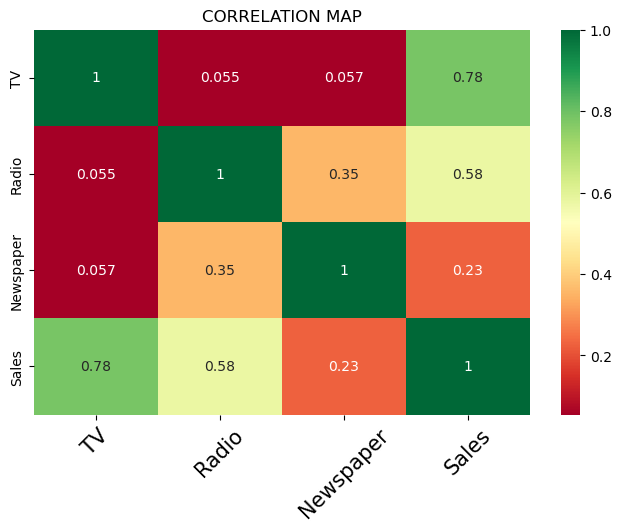

In [6]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45, size=15)
plt.title("CORRELATION MAP")
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn");
# we can see that sales are more correlated with TV(%78)

In [7]:
abs(df.corr(numeric_only=True)["Sales"]).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

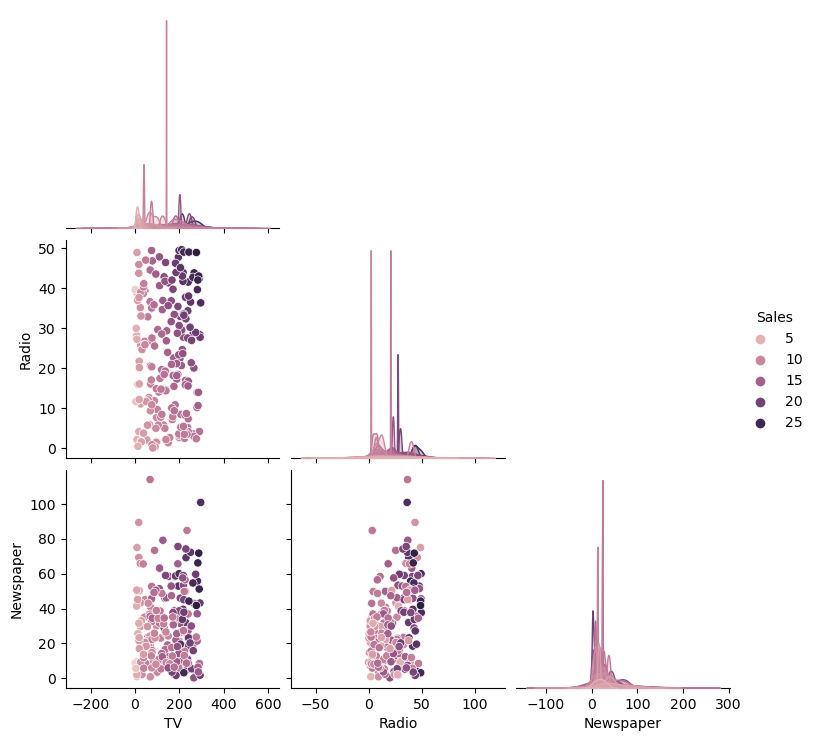

In [8]:
sns.pairplot(df, hue="Sales", corner=True);

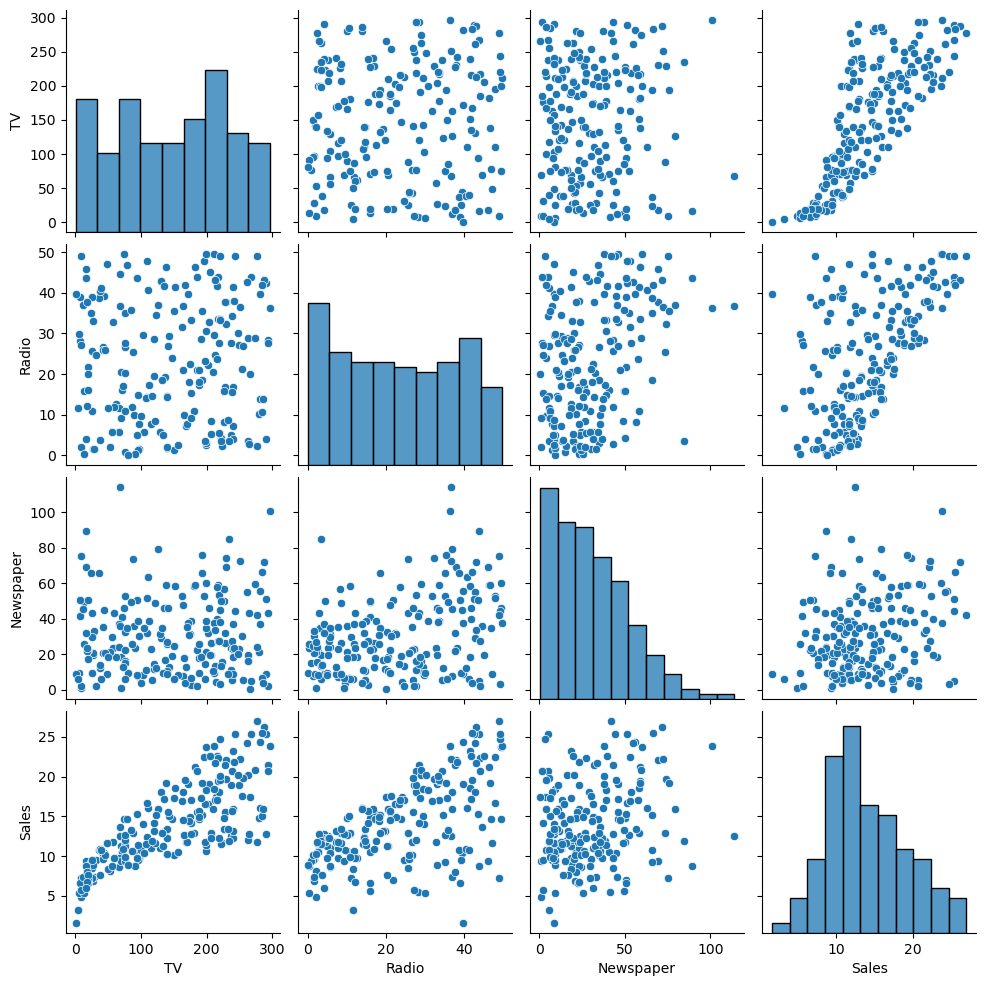

In [9]:
sns.pairplot(df);

## Outlier Analysis

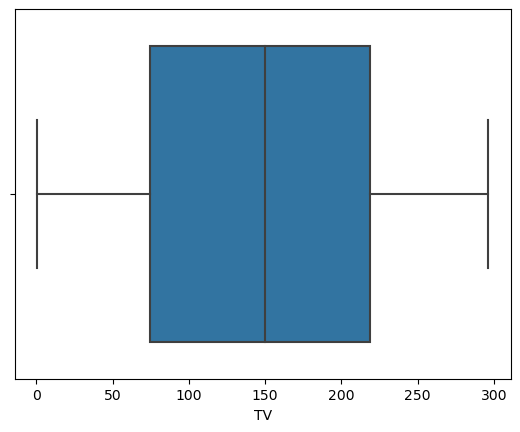

In [10]:
sns.boxplot(df, x="TV");

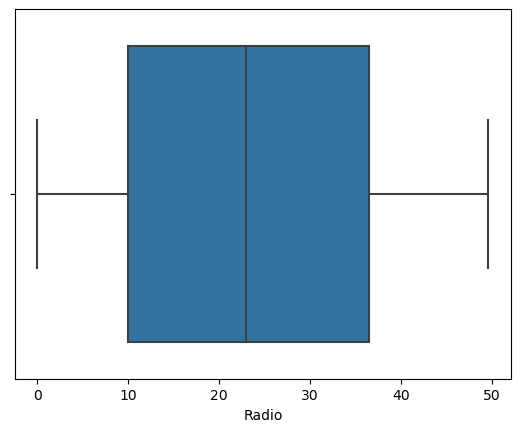

In [11]:
sns.boxplot(x=df["Radio"]);

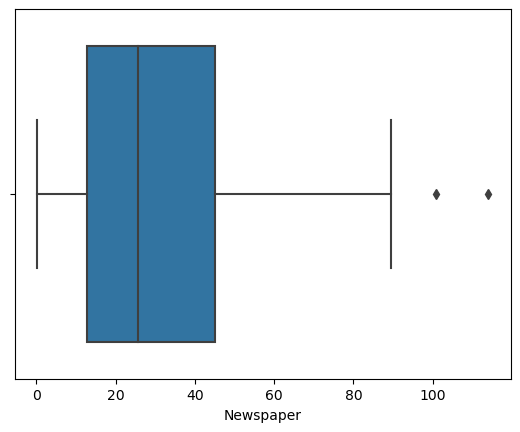

In [12]:
sns.boxplot(df, x="Newspaper");

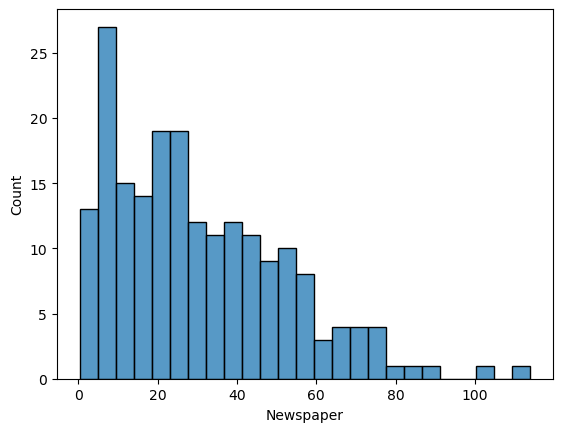

In [13]:
sns.histplot(df, x="Newspaper", bins=25);

In [4]:
df = df[df.Newspaper<100]

In [5]:
X = df.drop(["Sales"], axis=1)
y = df[["Sales"]]

## Modelling

In [16]:
def algo_test(X,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable
    
algo_test(X,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.983948,0.659825,0.529839
XGBRegressor,0.983110,0.676832,0.588379
Decision Tree,0.962670,1.006231,0.810000
Extra Tree,0.952863,1.130708,0.900000
KNeighborsRegressor,0.926056,1.416189,0.901500
Linear,0.898945,1.655570,1.249739
Ridge,0.898943,1.655592,1.249763
ElasticNet,0.898562,1.658711,1.253020
Lasso,0.898557,1.658747,1.252581


In [33]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=42)
GBR=GradientBoostingRegressor()
model = GBR.fit(x_train,y_train)
prediction= model.predict(x_test)
print(f"R2 score: {r2_score(y_test, prediction)}\nRoot Mean squared error: {mean_squared_error(y_test, prediction)**.5}") 


R2 score: 0.9839489966211269
Root Mean squared error: 0.6598128293277681


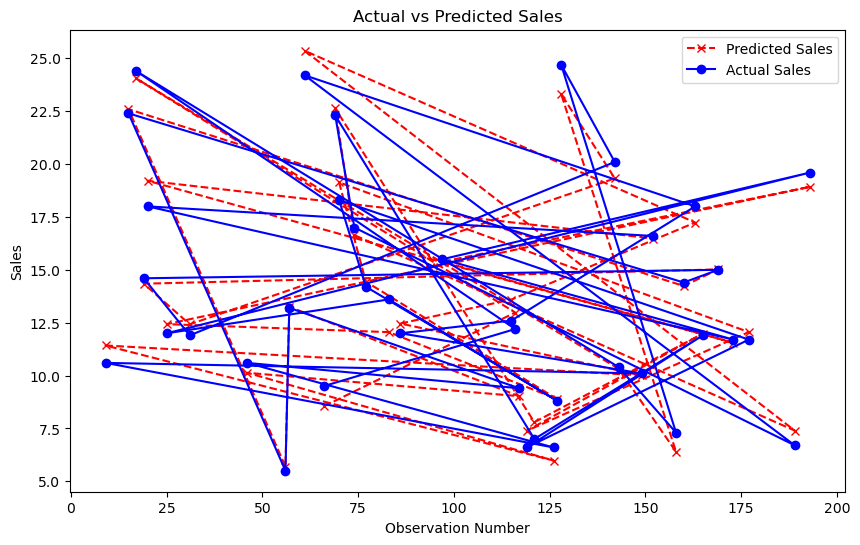

In [37]:
prediction_df = pd.DataFrame(prediction, index=y_test.index, columns=y_test.columns)
plt.figure(figsize=(10, 6)) 
plt.plot(prediction_df, label='Predicted Sales', color='red', linestyle='--', marker='x')
plt.plot(y_test, label='Actual Sales', color='blue', marker='o')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Observation Number')
plt.ylabel('Sales')
plt.legend();


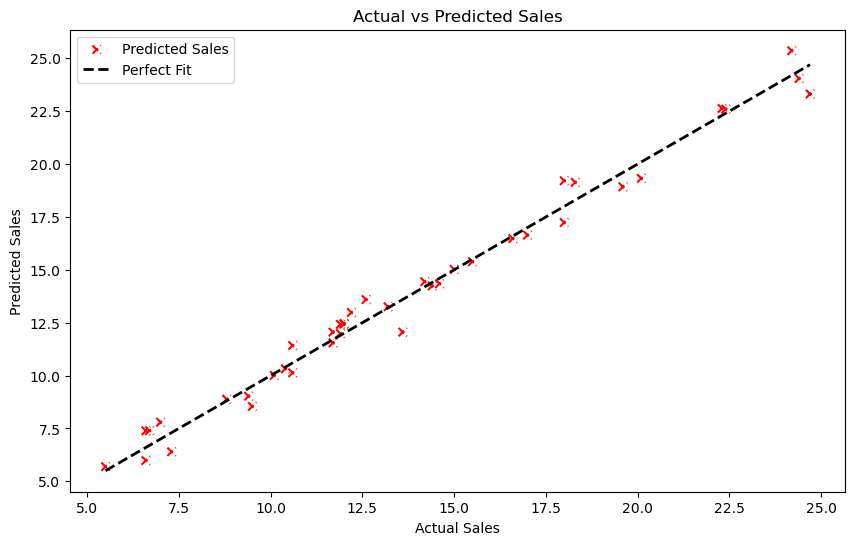

In [39]:
import matplotlib.pyplot as plt

# Extract values for plotting
x_values = y_test.iloc[:, 0]  
y_values = prediction_df.iloc[:, 0]  

plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(x_values, y_values, color='red', linestyle='--', marker='x', label='Predicted Sales')

# Optionally, plot a line representing perfect predictions for reference
plt.plot([x_values.min(), x_values.max()], [x_values.min(), x_values.max()], 'k--', lw=2, label='Perfect Fit')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()


## Feature Importance

In [30]:
feature_importances = model.feature_importances_

In [31]:
feature_importances

array([0.62287683, 0.37525616, 0.00186701])

In [32]:
feature_names = ['TV', 'Radio', 'Newspaper']  
importances = dict(zip(feature_names, feature_importances))
importances

{'TV': 0.6228768294817931,
 'Radio': 0.3752561605044522,
 'Newspaper': 0.00186701001375462}

In [33]:
for feature, importance in sorted(importances.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

TV: 0.6228768294817931
Radio: 0.3752561605044522
Newspaper: 0.00186701001375462


In [36]:
prediction_df = pd.DataFrame(prediction, index=y_test.index, columns=y_test.columns)
residuals = prediction_df - y_test
residuals

,Sales
66,-0.958703
116,0.780707
17,-0.351428
143,-0.077428
158,-0.902708
128,-1.385989
142,-0.775955
31,0.522477
19,-0.256573
169,0.018687


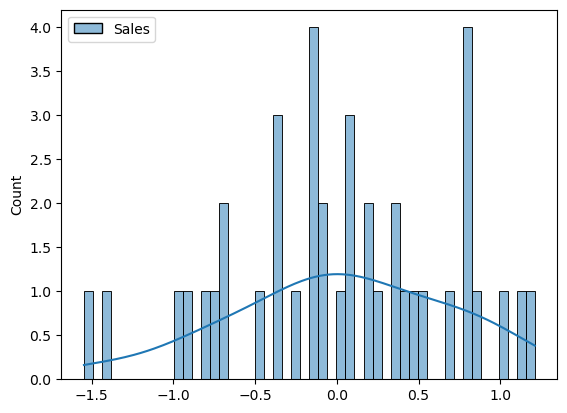

In [37]:
sns.histplot(residuals, kde=True, bins=50);

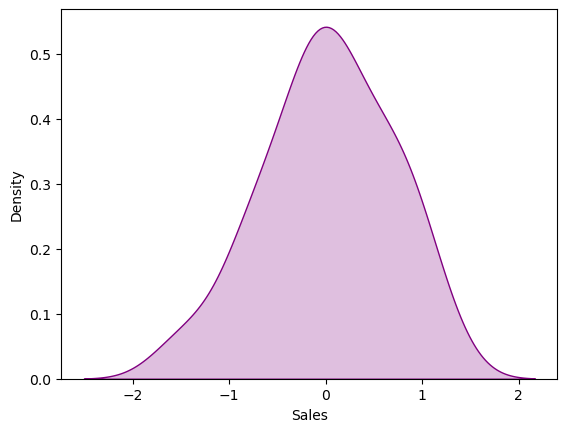

In [38]:
sns.kdeplot(residuals, x="Sales", color="purple", fill=True);

In [39]:
# normal distribution test
from scipy import stats
stats.shapiro(residuals)

ShapiroResult(statistic=0.9804607629776001, pvalue=0.7066537141799927)